In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler 
df1 = pd.read_csv('new_olist_order_items_dataset.csv')
df2 = pd.read_csv('new_olist_order_payments_dataset.csv')
df1

,order_id,order_item_id,product_id,seller_id,price,freight_value,shipping_limit_date_yr,shipping_limit_date_mo,shipping_limit_date_dy,shipping_limit_date_hr,shipping_limit_date_mi,shipping_limit_date_sec
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,2017,9,19,9,45,35
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,2017,5,3,11,5,13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,2018,1,18,14,48,30
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,2018,8,15,10,10,18
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,2017,2,13,13,57,51
...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,2018,5,2,4,11,1
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,2018,7,20,4,31,48
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,2017,10,30,17,14,25
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,2017,8,21,0,4,32


In [132]:
df3 = df1.merge(df2,on='order_id')
df3

,order_id,order_item_id,product_id,seller_id,price,freight_value,shipping_limit_date_yr,shipping_limit_date_mo,shipping_limit_date_dy,shipping_limit_date_hr,shipping_limit_date_mi,shipping_limit_date_sec,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,2017,9,19,9,45,35,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,2017,5,3,11,5,13,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,2018,1,18,14,48,30,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,2018,8,15,10,10,18,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,2017,2,13,13,57,51,1,credit_card,3,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,2018,5,2,4,11,1,1,boleto,1,343.40
117597,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,2018,7,20,4,31,48,1,boleto,1,386.53
117598,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,2017,10,30,17,14,25,1,credit_card,3,116.85
117599,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,2017,8,21,0,4,32,1,credit_card,3,64.71


In [133]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(df3['payment_type'], prefix='payment_type').iloc[:, 1:]
area_dummies

,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
117596,0,0,0
117597,0,0,0
117598,1,0,0
117599,1,0,0


In [134]:
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
df3= pd.concat([df3, area_dummies], axis=1)
df3

,order_id,order_item_id,product_id,seller_id,price,freight_value,shipping_limit_date_yr,shipping_limit_date_mo,shipping_limit_date_dy,shipping_limit_date_hr,shipping_limit_date_mi,shipping_limit_date_sec,payment_sequential,payment_type,payment_installments,payment_value,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,2017,9,19,9,45,35,1,credit_card,2,72.19,1,0,0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,2017,5,3,11,5,13,1,credit_card,3,259.83,1,0,0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,2018,1,18,14,48,30,1,credit_card,5,216.87,1,0,0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,2018,8,15,10,10,18,1,credit_card,2,25.78,1,0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,2017,2,13,13,57,51,1,credit_card,3,218.04,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,2018,5,2,4,11,1,1,boleto,1,343.40,0,0,0
117597,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,2018,7,20,4,31,48,1,boleto,1,386.53,0,0,0
117598,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,2017,10,30,17,14,25,1,credit_card,3,116.85,1,0,0
117599,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,2017,8,21,0,4,32,1,credit_card,3,64.71,1,0,0


In [135]:
df3=df3.drop(['order_id','product_id','seller_id','payment_type'],axis=1)

In [136]:
print(df3.price.sum())
print(df3.freight_value.sum())
print(df3.payment_value.sum())
## in sales prediction we have to predict the payment_value not the price because price can be up or low in specific 
## season but payment describe the amount of money spend during payment of specfic product so it detrmine the amount of sales

14209115.340000002
2357428.51
20308134.709999997


In [137]:
df3.isna().sum()

order_item_id               0
price                       0
freight_value               0
shipping_limit_date_yr      0
shipping_limit_date_mo      0
shipping_limit_date_dy      0
shipping_limit_date_hr      0
shipping_limit_date_mi      0
shipping_limit_date_sec     0
payment_sequential          0
payment_installments        0
payment_value               0
payment_type_credit_card    0
payment_type_debit_card     0
payment_type_voucher        0
dtype: int64

In [138]:
scaler =StandardScaler()
X =df3.drop(columns = ['payment_value'])
X_scaled = scaler.fit_transform(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns
vif

,VIF,Features
0,1.019341,order_item_id
1,1.284877,price
2,1.225155,freight_value
3,1.472387,shipping_limit_date_yr
4,1.452488,shipping_limit_date_mo
5,1.005560,shipping_limit_date_dy
6,1.584738,shipping_limit_date_hr
7,1.002680,shipping_limit_date_mi
8,1.012475,shipping_limit_date_sec
9,1.374345,payment_sequential


In [139]:
lm = smf.ols(formula='payment_value ~ price + order_item_id  + freight_value + shipping_limit_date_yr + shipping_limit_date_mo + shipping_limit_date_dy + shipping_limit_date_hr + shipping_limit_date_mi + shipping_limit_date_sec + payment_sequential + payment_installments + payment_type_credit_card + payment_type_debit_card + payment_type_voucher', data=df3).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          payment_value   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                 1.608e+04
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:38:02   Log-Likelihood:            -7.6130e+05
No. Observations:              117601   AIC:                         1.523e+06
Df Residuals:                  117586   BIC:                         1.523e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -5899.5224   2219.165     -2.658      0.008   -1.02e+04   -1549.994
price                        1.0367      0.003    369.102      0.000       1.031       1.042
order_item_id              116.8723      0.661    176.678      0.000     115.576     118.169
freight_value                1.3460      0.032     42.192      0.000       1.283       1.408
shipping_limit_date_yr       2.8773      1.100      2.617      0.009       0.722       5.033
shipping_limit_date_mo       0.6734      0.171      3.933      0.000       0.338       1.009
shipping_limit_date_dy      -0.0983      0.053     -1.856      0.064      -0.202       0.006
shipping_limit_date_hr       0.0253      0.087      0.291      0.771      -0.145       0.196
shipping_limit_date_mi      -0.0518      0.028     -1.869      0.062      -0.106       0.003
shipping_limit_date_sec      0.0534      0.031      1.747      0.081      -0.007       0.113
payment_sequential         -15.6173      0.737    -21.177      0.000     -17.063     -14.172
payment_installments         3.7879      0.192     19.767      0.000       3.412       4.163
payment_type_credit_card   -23.5795      1.549    -15.219      0.000     -26.616     -20.543
payment_type_debit_card    -19.2735      4.054     -4.754      0.000     -27.220     -11.327
payment_type_voucher       -73.4325      2.702    -27.178      0.000     -78.728     -68.137
==============================================================================
Omnibus:                   311879.266   Durbin-Watson:                   0.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      21331401014.386
Skew:                          31.357   Prob(JB):                         0.00
Kurtosis:                    2088.516   Cond. No.                     9.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
print(lm.rsquared)
print(lm.rsquared_adj)

0.6568447018384478
0.656803845153347


In [141]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
scaler =StandardScaler()
x=df3.drop(['payment_value'],axis=1)
X_scaled = scaler.fit_transform(x)
#X_scaled = scaler.fit_transform(df3[['price','shipping_limit_date_yr','shipping_limit_date_mo','order_item_id','freight_value','payment_installments']])
y = df3.payment_value

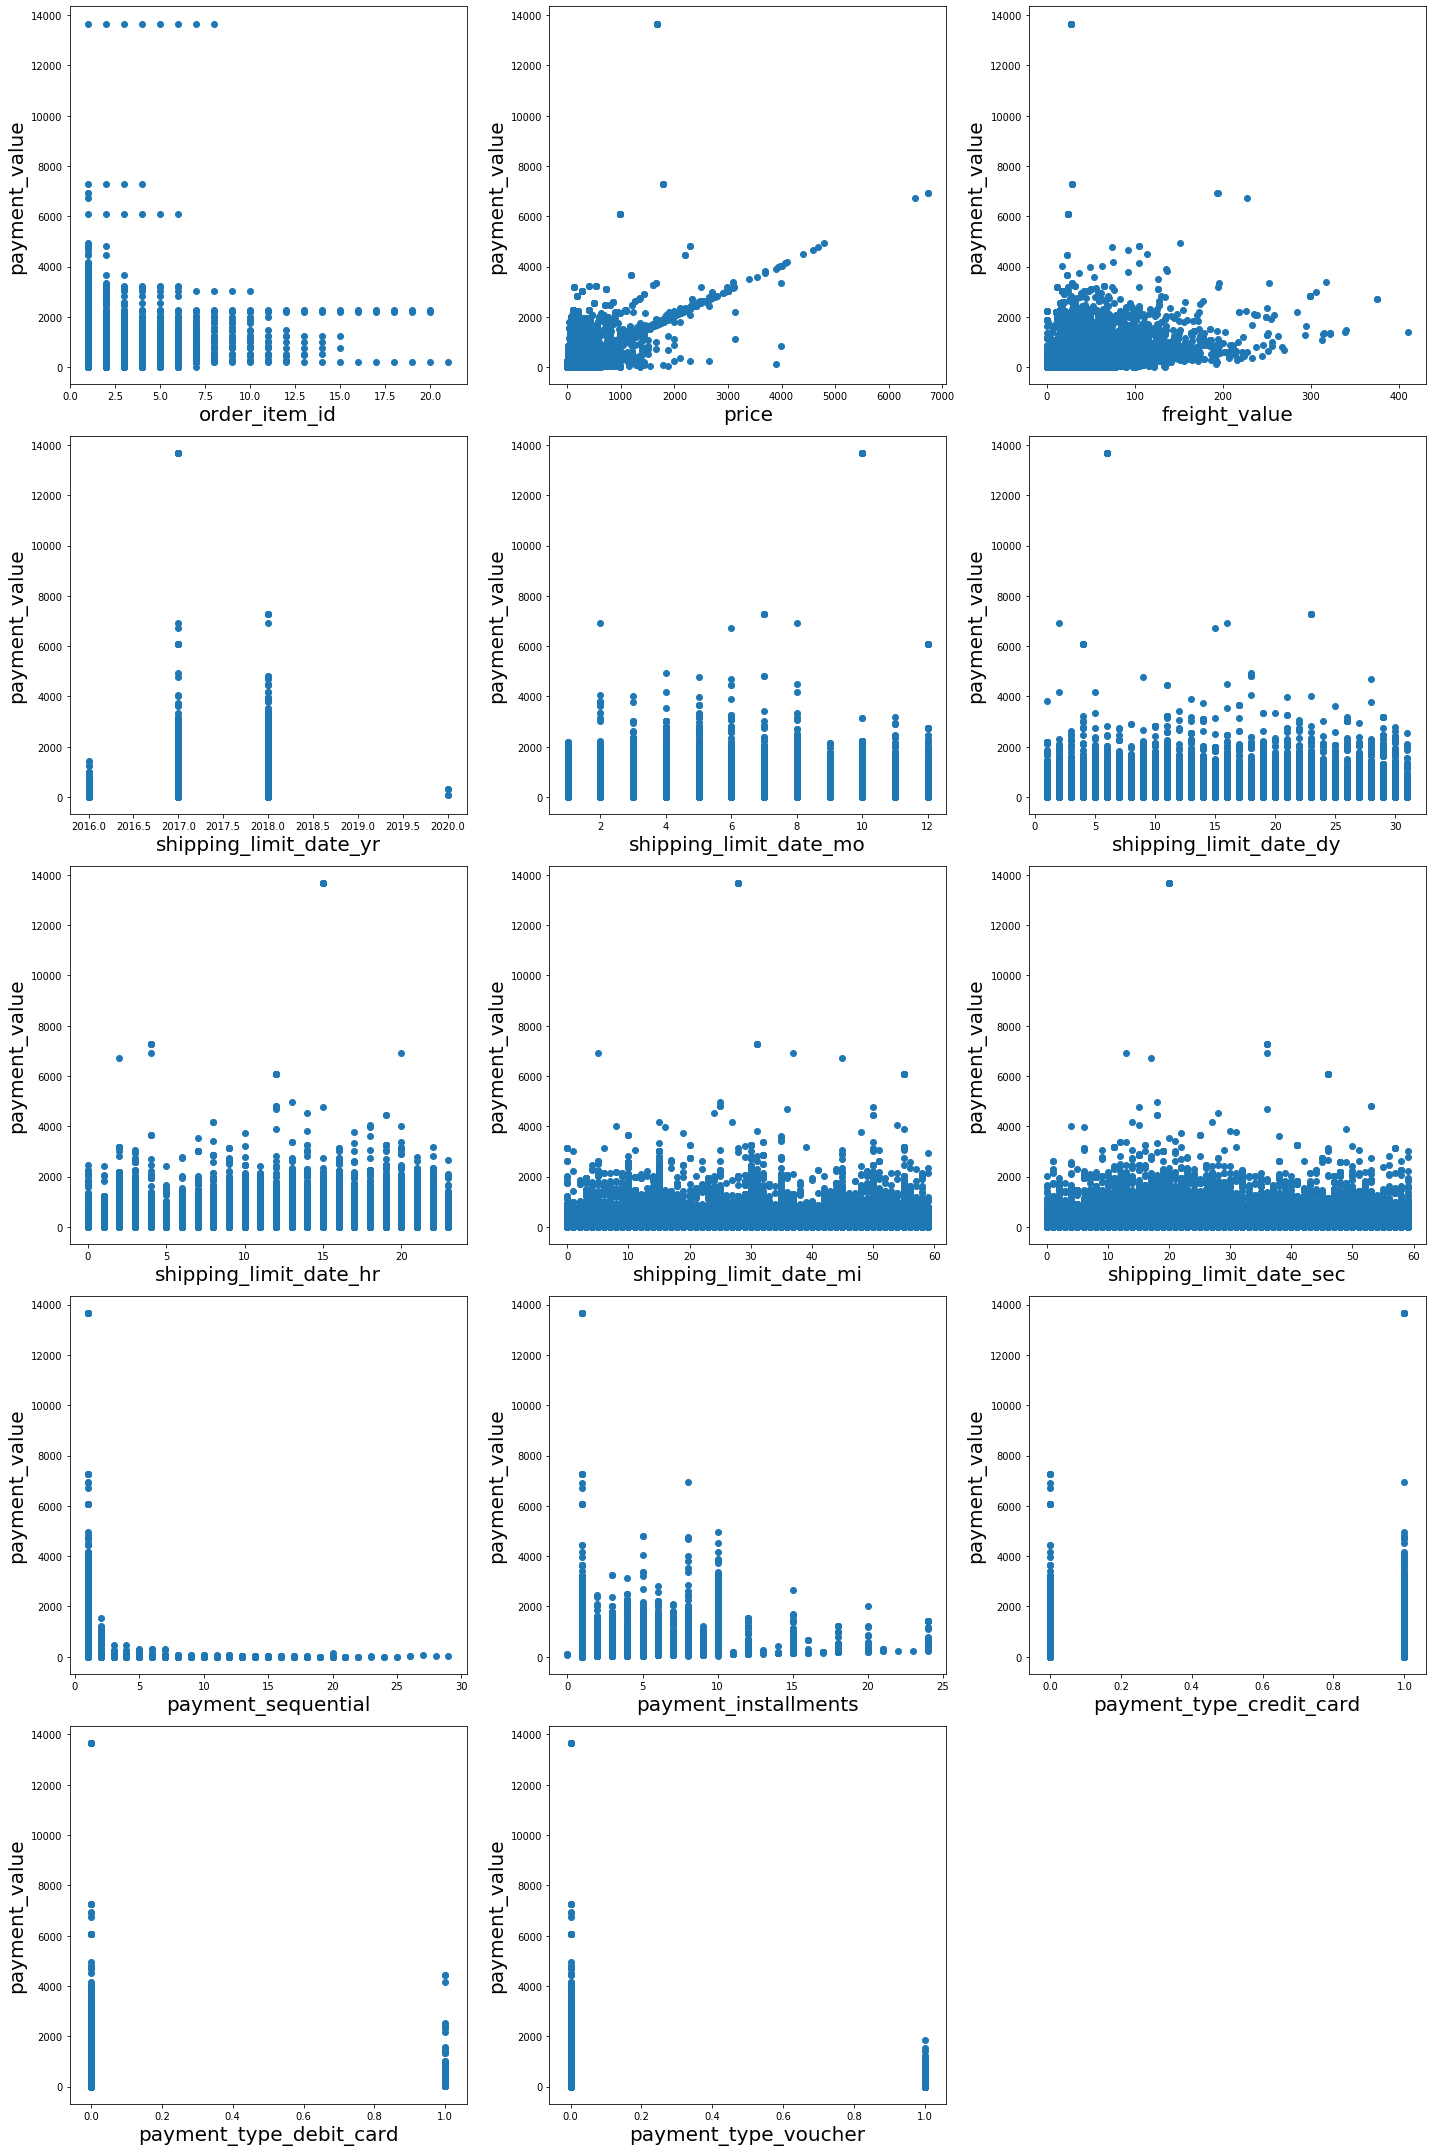

In [153]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(df3[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('payment_value',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [144]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [145]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [147]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
#a=loaded_model.predict(scaler.transform([[1,58.90,13.29,2017,9,19,9,45,35,1,2,1,0,0]]))
a=loaded_model.predict(scaler.transform([[1,58.90,13.29,2017,9,19,9,45,35,1,2,1,0,0]]))
a
# 1df3 array([73.22730949])

array([73.22730949])

In [148]:
Y_predicted=loaded_model.predict(x_test)

In [149]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, Y_predicted))
print(math.sqrt(mean_squared_error(y_test, Y_predicted)))
#27380.495546558326
#165.470527727926


27380.495546558326
165.470527727926


In [150]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, Y_predicted))
#MAE: 45.607169984972195

45.607169984972195


In [154]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [155]:
regression.score(x_train,y_train)

0.6619215690372877

In [156]:
adj_r2(x_test,y_test)

0.6422583514677136